# Quick, Draw! Challenge

Quick, Draw! is an online game developed by Google that challenges players to draw a picture of an object or idea and then uses a neural network artificial intelligence to guess what the drawings represent. (Wikipedia)

### Task

Build a neural network to identify the categories of the drawings.

### Dataset

20 Categories from the Quick, Draw! challenge. I use 12,000 drawings per category to build a neural network using Keras framework.

## Import Drive and download Quickdraw file

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
PATH = '/content/drive/My Drive'
import os
os.chdir(PATH)

In [ ]:
!wget -qq https://www.dropbox.com/s/gdlb8dnjzcly51o/quickdraw.zip
  
!unzip -qq quickdraw.zip

!rm -r __MACOSX
!rm quickdraw.zip

# !ls

In [4]:
!ls quickdraw

'alarm clock.npy'   bee.npy		 cookie.npy	  lollipop.npy
 ambulance.npy	   'birthday cake.npy'	 donut.npy	 'palm tree.npy'
 angel.npy	    brain.npy		 eyeglasses.npy   pig.npy
 ant.npy	    cactus.npy		 face.npy	  postcard.npy
 banana.npy	    cat.npy		 fish.npy	  rainbow.npy


## Prepare data for network

In [3]:
QUICKDRAW_PATH = os.path.join(PATH, 'quickdraw')

In [5]:
import ntpath

CLASS_NAMES = []

for file in os.listdir(QUICKDRAW_PATH):
  name = ntpath.basename(file)
  CLASS_NAMES.append(name[:-4])
  
print(CLASS_NAMES)

['alarm clock', 'ambulance', 'angel', 'ant', 'banana', 'bee', 'birthday cake', 'brain', 'cactus', 'cat', 'cookie', 'donut', 'eyeglasses', 'face', 'fish', 'lollipop', 'palm tree', 'pig', 'postcard', 'rainbow']


In [42]:
import numpy as np
x_data =np.array([])
y_labels =np.array([])
n = 12000

for i, class_name in enumerate(CLASS_NAMES):
  filename = os.path.join(QUICKDRAW_PATH, class_name+'.npy')
  labels = [i for j in range(n)]
  arr = np.load(filename)
  arr = arr[:n]
  if len(x_data) == 0:
    x_data = arr
    y_labels = np.asarray(labels)
  else:
    x_data = np.concatenate((x_data, arr))
    y_labels = np.concatenate((y_labels, labels))

In [43]:
x_data.shape, y_labels.shape

((240000, 784), (240000,))

In [44]:
from sklearn.utils import shuffle

x_data, y_labels = shuffle(x_data, y_labels, random_state=42)


from sklearn.model_selection import train_test_split

x, x_test, y, y_test = train_test_split(x_data, y_labels, test_size=0.1, random_state=42)
x.shape, y.shape

((216000, 784), (216000,))

In [45]:
x, y = shuffle(x, y, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, y_train.shape

((172800, 784), (172800,))

## Data Pipeline

In [46]:
import tensorflow as tf
n_classes = len(CLASS_NAMES)

In [47]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))

In [48]:
BATCH_SIZE = 64
SHUFFLE_BUFFER_SIZE = 100

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
val_dataset = val_dataset.batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

## Baseline model

In [59]:
y_train[:10]

array([15, 16,  1,  5, 12, 16,  1,  5, 11, 11])

We use Sparse Categorical Crossentropy loss because the y labels are in integers and not one-hot encoded.

In [49]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(x_train[1].shape)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(n_classes)
])

model.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['sparse_categorical_accuracy'])

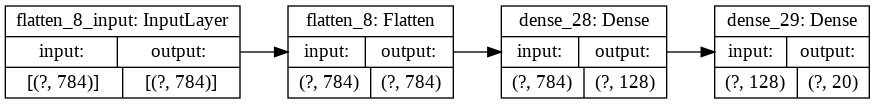

In [50]:
tf.keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

### Train

In [51]:
model.fit(train_dataset, validation_data=val_dataset, epochs=10)

Epoch 1/10
2700/2700 [==============================] - 7s 2ms/step - loss: 3.2394 - sparse_categorical_accuracy: 0.2923 - val_loss: 2.3774 - val_sparse_categorical_accuracy: 0.3402
Epoch 2/10
2700/2700 [==============================] - 6s 2ms/step - loss: 2.3691 - sparse_categorical_accuracy: 0.3591 - val_loss: 2.4597 - val_sparse_categorical_accuracy: 0.3886
Epoch 3/10
2700/2700 [==============================] - 6s 2ms/step - loss: 2.3318 - sparse_categorical_accuracy: 0.3784 - val_loss: 2.4016 - val_sparse_categorical_accuracy: 0.3784
Epoch 4/10
2700/2700 [==============================] - 6s 2ms/step - loss: 2.3356 - sparse_categorical_accuracy: 0.3804 - val_loss: 2.6856 - val_sparse_categorical_accuracy: 0.3770
Epoch 5/10
2700/2700 [==============================] - 7s 2ms/step - loss: 2.3359 - sparse_categorical_accuracy: 0.3820 - val_loss: 2.5593 - val_sparse_categorical_accuracy: 0.3724
Epoch 6/10
2700/2700 [==============================] - 6s 2ms/step - loss: 2.3706 - spars

### Evaluate

In [52]:
model.evaluate(test_dataset)

375/375 [==============================] - 1s 2ms/step - loss: 2.7092 - sparse_categorical_accuracy: 0.3536


[2.7091574668884277, 0.35358333587646484]

## Deeper model

In [53]:
rate = 0.2
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(x_train[1].shape)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(rate),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(rate),
    tf.keras.layers.Dense(n_classes)
])

model.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['sparse_categorical_accuracy'])

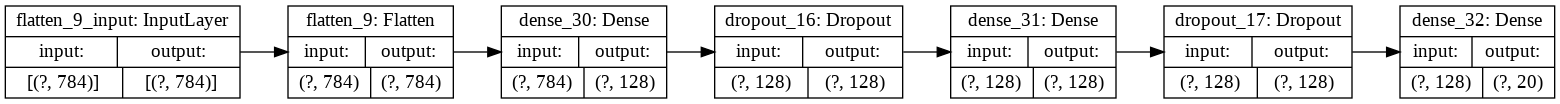

In [54]:
tf.keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

### Train

In [55]:
model.fit(train_dataset, validation_data=val_dataset, epochs=10)

Epoch 1/10
2700/2700 [==============================] - 7s 3ms/step - loss: 3.1940 - sparse_categorical_accuracy: 0.1852 - val_loss: 2.4691 - val_sparse_categorical_accuracy: 0.2574
Epoch 2/10
2700/2700 [==============================] - 7s 3ms/step - loss: 2.3863 - sparse_categorical_accuracy: 0.2956 - val_loss: 1.9825 - val_sparse_categorical_accuracy: 0.4290
Epoch 3/10
2700/2700 [==============================] - 7s 3ms/step - loss: 2.1277 - sparse_categorical_accuracy: 0.3903 - val_loss: 1.7809 - val_sparse_categorical_accuracy: 0.4784
Epoch 4/10
2700/2700 [==============================] - 7s 3ms/step - loss: 2.0179 - sparse_categorical_accuracy: 0.4268 - val_loss: 1.6914 - val_sparse_categorical_accuracy: 0.5136
Epoch 5/10
2700/2700 [==============================] - 7s 3ms/step - loss: 1.9115 - sparse_categorical_accuracy: 0.4556 - val_loss: 1.6541 - val_sparse_categorical_accuracy: 0.5317
Epoch 6/10
2700/2700 [==============================] - 7s 3ms/step - loss: 1.8680 - spars

### Evaluate

In [56]:
model.evaluate(test_dataset)

375/375 [==============================] - 1s 2ms/step - loss: 1.5736 - sparse_categorical_accuracy: 0.5547


[1.5736123323440552, 0.5547083616256714]

## Even deeper model

I tested using a wider model (fully connected layer with 500 nodes) but the results were worse than the baseline model. Therefore, I will try an even deeper model.

In [65]:
rate = 0.2
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(x_train[1].shape)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(rate),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(rate),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(rate),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(rate),
    tf.keras.layers.Dense(n_classes)
])

model.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['sparse_categorical_accuracy'])

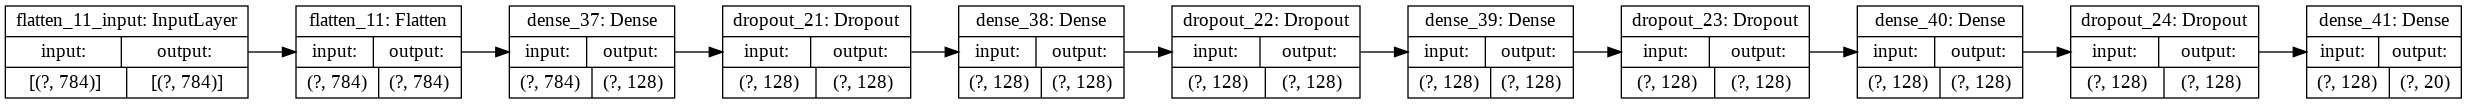

In [66]:
tf.keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

In [67]:
lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0001) 
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

model.fit(train_dataset, validation_data=val_dataset, epochs=20, callbacks=[lr, es])

Epoch 1/20
2700/2700 [==============================] - 8s 3ms/step - loss: 2.4622 - sparse_categorical_accuracy: 0.3301 - val_loss: 1.7364 - val_sparse_categorical_accuracy: 0.4721
Epoch 2/20
2700/2700 [==============================] - 8s 3ms/step - loss: 1.8830 - sparse_categorical_accuracy: 0.4373 - val_loss: 1.6159 - val_sparse_categorical_accuracy: 0.5046
Epoch 3/20
2700/2700 [==============================] - 8s 3ms/step - loss: 1.8244 - sparse_categorical_accuracy: 0.4598 - val_loss: 1.5487 - val_sparse_categorical_accuracy: 0.5305
Epoch 4/20
2700/2700 [==============================] - 8s 3ms/step - loss: 1.7900 - sparse_categorical_accuracy: 0.4751 - val_loss: 1.5231 - val_sparse_categorical_accuracy: 0.5502
Epoch 5/20
2700/2700 [==============================] - 8s 3ms/step - loss: 1.7658 - sparse_categorical_accuracy: 0.4871 - val_loss: 1.5230 - val_sparse_categorical_accuracy: 0.5444
Epoch 6/20
2700/2700 [==============================] - 8s 3ms/step - loss: 1.7562 - spars

In [68]:
model.evaluate(test_dataset)

375/375 [==============================] - 1s 2ms/step - loss: 1.3507 - sparse_categorical_accuracy: 0.6048


[1.3507342338562012, 0.6048333048820496]